In [71]:
import pandas as pd
import numpy as np
import seaborn as sns

In [72]:
np.random.seed(200831)

In [73]:
voice = pd.read_csv("../../../datasets/voice.csv")

In [74]:
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [75]:
voice.rename(columns={column: column.lower() for column in voice.columns.values}, inplace=True)

In [76]:
voice.columns.values

array(['meanfreq', 'sd', 'median', 'q25', 'q75', 'iqr', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype=object)

1. ¿Cuántas observaciones tienes en el conjunto de entrenamiento? ¿Cuántas observaciones tienes en el conjunto de pruebas?


In [77]:
X = voice.drop(['label'], axis=1)
y = voice.label

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [80]:
print("train: ", train_x.shape[0], "\ntest: ", test_x.shape[0])

train:  2217 
test:  951


2. GridSearchCV 

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [82]:
rf = RandomForestClassifier(random_state=)

In [83]:
grid = {'n_estimators': [700, 800, 1000], 
        'criterion': ["gini", "entropy"], "min_samples_leaf": [5, 7, 9, 11]}

In [84]:
gs = GridSearchCV(rf, param_grid=grid, cv=10, scoring="accuracy", n_jobs=-1)

In [85]:
gs.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [5, 7, 9, 11],
                         'n_estimators': [700, 800, 1000]},
             scoring='accuracy')

3. ¿Cuántos modelos se entrenaron?
 24

4. ¿Cuál es el mejor estimador encontrado por el GridSearchCV? Incluye los valores de cada parámetro

In [86]:
model = gs.best_estimator_
model

RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       n_estimators=800)

    a. ¿Cuál es el mejor score del mejor estimador?

In [87]:
gs.best_score_

0.9801597978068566

5. ¿Cuáles son las tres variables que brindan más información del mejor estimador obtenido con el GridSearchCV? Incluye el porcentaje de importancia


In [88]:
model.feature_importances_

array([0.01808351, 0.09237966, 0.01237253, 0.1117132 , 0.01149196,
       0.17302253, 0.00996981, 0.0089864 , 0.04448433, 0.0312034 ,
       0.01661851, 0.01657481, 0.40111172, 0.0080351 , 0.00445202,
       0.00824737, 0.00677152, 0.00970888, 0.00962644, 0.00514631])

In [89]:
feature_importance = pd.DataFrame({'feature': train_x.columns.values, 
                                  'importance': model.feature_importances_})

In [90]:
feature_importance.sort_values(by="importance", ascending=False).head()

,feature,importance
12,meanfun,0.401112
5,iqr,0.173023
3,q25,0.111713
1,sd,0.092380
8,sp.ent,0.044484


In [91]:
feature_importance.tail()

,feature,importance
15,meandom,0.008247
16,mindom,0.006772
17,maxdom,0.009709
18,dfrange,0.009626
19,modindx,0.005146


6. Predicciones con el mejor estimador de la última observación

In [92]:
gs.predict(test_x.tail(1))

array(['female'], dtype=object)

In [93]:
gs.predict_proba(test_x.tail(1))

array([[0.8932428, 0.1067572]])

7. Predicciones con el mejor estimado 

In [94]:
prediction_labels = gs.predict(test_x)
prediction_scores = gs.predict_proba(test_x)

7. ¿Cuál es el valor de Accuracy en el conjunto de pruebas?

In [95]:
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

%matplotlib inline

In [96]:
accuracy_score(test_y, prediction_labels)

0.9674027339642481

8. Grafica el ROC y obtén el AUC

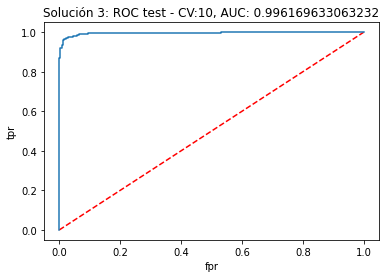

In [121]:
fpr, tpr, thresholds = roc_curve(test_y.values, prediction_scores[:,1], pos_label="male")

plt.clf()
plt.plot([0, 1], [0, 1], 'k--', c="red")
plt.plot(fpr, tpr)
plt.title("Solución 3: ROC test - CV:10, AUC: " + str(roc_auc_score(test_y, prediction_scores[:,1])))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()


9. ¿Cuál es el punto de corte a utilizar en producción para que **no** tengamos más de 1% de falsos positivos logrando la mayor cantidad de verdaderos positivos? ¿Cuál es el FPR y TPR asociado a ese punto de corte?

In [98]:
df_metrics = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})

In [113]:
df_metrics[df_metrics.fpr < 0.1].sort_values(by="fpr", ascending=False)

,fpr,tpr,thresholds
38,0.097458,0.995825,0.196597
37,0.097458,0.993737,0.201101
36,0.095339,0.993737,0.202760
35,0.095339,0.991649,0.202924
34,0.067797,0.991649,0.279400
33,0.067797,0.989562,0.284092
32,0.063559,0.989562,0.291532
31,0.063559,0.987474,0.295303
29,0.061441,0.985386,0.308657
30,0.061441,0.987474,0.295708


In [101]:
punto_corte = df_metrics[df_metrics.fpr < 0.01].sort_values(by=["fpr", "tpr"], ascending=False).head(1)
punto_corte

,fpr,tpr,thresholds
10,0.008475,0.93737,0.818246


In [117]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(test_y, prediction_scores[:,1], pos_label="male")

In [118]:
thresholds_ = np.append(threshold, 1)

In [125]:
precision_recall = pd.DataFrame({'precision': precision, 'recall': recall, 'thresholds': thresholds_})
tpr_fpr = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds})

metrics = tpr_fpr.merge(precision_recall, how="inner", on="thresholds")
metrics

,tpr,fpr,thresholds,precision,recall
0,0.029228,0.000000,1.000000,1.000000,0.029228
1,0.029228,0.000000,1.000000,1.000000,0.000000
2,0.033403,0.000000,0.999861,1.000000,0.033403
3,0.039666,0.000000,0.999792,1.000000,0.039666
4,0.048017,0.000000,0.999792,1.000000,0.048017
5,0.052192,0.000000,0.999687,1.000000,0.052192
6,0.868476,0.000000,0.921651,1.000000,0.868476
7,0.868476,0.002119,0.919670,0.997602,0.868476
8,0.920668,0.002119,0.859783,0.997738,0.920668
9,0.920668,0.008475,0.848183,0.991011,0.920668


In [127]:
metrics[metrics.fpr < 0.01]

,tpr,fpr,thresholds,precision,recall
0,0.029228,0.000000,1.000000,1.000000,0.029228
1,0.029228,0.000000,1.000000,1.000000,0.000000
2,0.033403,0.000000,0.999861,1.000000,0.033403
3,0.039666,0.000000,0.999792,1.000000,0.039666
4,0.048017,0.000000,0.999792,1.000000,0.048017
5,0.052192,0.000000,0.999687,1.000000,0.052192
6,0.868476,0.000000,0.921651,1.000000,0.868476
7,0.868476,0.002119,0.919670,0.997602,0.868476
8,0.920668,0.002119,0.859783,0.997738,0.920668
9,0.920668,0.008475,0.848183,0.991011,0.920668


10. Utilizando el punto de corte seleccionado en la pregunta anterior genera la matriz de confusión asociada -> Aquellos valores que sean iguales o mayores que el punto de corte seleccionado serán etiquetados como etiqueta positiva. 


In [128]:
punto_corte.thresholds.values[0]

0.8182461119354507

In [129]:
labels_punto_corte = ["male" if prediction >= punto_corte.thresholds.values[0] else "female" 
                      for prediction in prediction_scores[:,1]]

In [130]:
confusion_matrix(test_y, labels_punto_corte)

array([[468,   4],
       [ 30, 449]])